Bin index of each data point:
[ 1  3  3  5  6  7  8  9 10]
Data gap index of each bin:
[1 1 3 3 3 5 6 6 7 9]


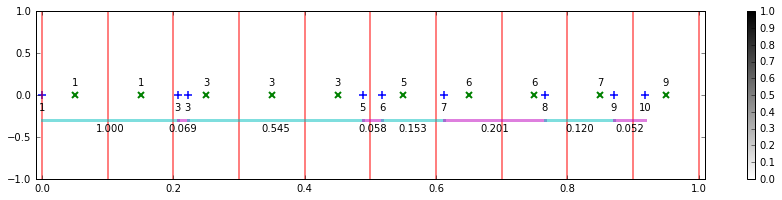

In [32]:
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(5)
num_values = 8
num_bins = 10
x = np.random.random(num_values)
x = np.append(x, [0.0])
x = numpy.sort(x)
bin_edges = np.linspace(0, 1, num_bins + 1) 
bin_centres = (bin_edges[1:] + bin_edges[:-1]) / 2
num_values = x.shape[0]

# Bin index of each data point
bin_idx = np.digitize(x, bin_edges)
# Data point gap (diff) index of each bin
data_idx = np.digitize(bin_centres, x)

print('Bin index of each data point:')
print(bin_idx)
print('Data gap index of each bin:')
print(data_idx)

x_diff = np.diff(x)
x_diff_norm = x_diff / x[1:]
image = np.zeros((1, num_bins))
    
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
ax.plot(x, np.zeros_like(x), '+', ms=8, mew=1.5)
ax.set_ylim(-1, 1)
ax.set_xlim(-0.01, 1.01)
for edge in bin_edges:
    ax.plot([edge, edge], ax.get_ylim(), 'r-', lw=2.0, alpha=0.5)
ax.plot(bin_centres, np.zeros_like(bin_centres), 'gx', mew=2.0)
im = ax.imshow(image, interpolation='nearest', cmap='gray_r', vmin=0.0, vmax=1.0, extent=[0.0, 1.0, -1.0, 1.0])
ax.figure.colorbar(im, ax=ax)
ax.set_aspect('auto')
for i in range(num_bins):
    ax.text(bin_centres[i], 0.15, '%i' % data_idx[i], va='center', ha='center')
for i in range(num_values):
    ax.text(x[i], -0.15, '%i' % bin_idx[i], va='center', ha='center')
colors = ['c', 'm']
for i in range(num_values - 1):
    ax.plot([x[i], x[i+1]], [-0.3, -0.3], '-', color=colors[i % 2], lw=3.0, alpha=0.5)
    ax.text(x[i] + x_diff[i] / 2.0, -0.4, '%.3f' % x_diff_norm[i], va='center', ha='center')